In [ ]:
from google.colab import files


uploaded = files.upload()


Saving valid.csv to valid.csv
Saving train.csv to train.csv
Saving test.csv to test.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Import Train set
train_df = pd.read_csv("train.csv", encoding='latin-1')
train_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,jqutn5ou8_0_9,"We have ETF updates now, we have intraday upda...",0,75.131,81.618
1,CMU-MOSEI,72017_2,"And it's basically about , it's about Dracula...",0,3.653,12.056
2,CMU-MOSEI,248400_4,"Nevertheless, the Last Crusade returns to the...",0,13.74,23.271
3,CMU-MOSEI,zv0Jl4TIQDc_5,This is another exercise where we're going to ...,0,29.764,35.633
4,CMU-MOSEI,jjbOD6u7V34_16,They're going to kill us as soon as you leave....,0,77.755,112.508


In [ ]:
print('length of data is', len(train_df))

length of data is 11824


In [ ]:
# Import Test set
test_df = pd.read_csv("/content/test.csv", encoding='latin-1')
test_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,121128_3,The rat is able to control the boy so that th...,0,19.347,26.912
1,CMU-MOSEI,56006_7,"But it's just, it's just a really gross movie",1,37.566,40.651
2,CMU-MOSEI,nhD9WSEIspQ_16,"So if you watch the mobile space in Japan, you...",0,90.236,98.31
3,CMU-MOSEI,kld9r0iFkWM_2,"Which distribution channels, such as brick and...",0,13.81,20.427
4,CMU-MOSEI,63951_8,"It's full of cliches, it's got a stupid love ...",1,57.102,62.731


In [ ]:
print('length of data is', len(test_df))

length of data is 2550


In [ ]:
# Import Validation set
valid_df = pd.read_csv("/content/valid.csv", encoding='latin-1')
valid_df.head()

,Dataset,FileName,text,label2a,Starting,Ending
0,CMU-MOSEI,5Tqu1IXJjGY_3,"All it takes is for mum to walk in and say, ""W...",1,13.53061224,19.15011338
1,CMU-MOSEI,mNurUl_Q2UY_9,But that interest will accrue.,0,71.948,74.764
2,CMU-MOSEI,237009_11,", it should be rated junk",1,54.019,56.645
3,CMU-MOSEI,33089_6,"It's got lots of like, really stupid humor bu...",0,40.878,48.893
4,CMU-MOSEI,234053_20,It's a bloody mess at points,1,73.554,76.021


In [ ]:
print('length of data is', len(valid_df))

length of data is 2602


<Axes: ylabel='Frequency'>

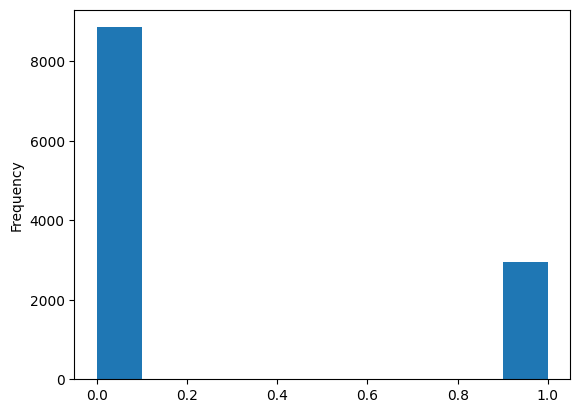

In [ ]:
train_df.label2a.plot.hist()

**Preprocess**

In [ ]:
x_train = train_df['text']
y_train = train_df['label2a']
x_test = test_df['text']
y_test = test_df['label2a']
x_valid = valid_df['text']
y_valid = valid_df['label2a']

In [ ]:
print(f'x_train size = {x_train.shape}')
print(f'y_train size = {y_train.shape}')
print(f'x_test size = {x_test.shape}')
print(f'y_test size = {y_test.shape}')
print(f'x_valid size = {x_valid.shape}')
print(f'y_valid size = {y_valid.shape}')

x_train size = (11824,)
y_train size = (11824,)
x_test size = (2550,)
y_test size = (2550,)
x_valid size = (2602,)
y_valid size = (2602,)


In [ ]:
import re
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(stopwords.words('english'))
stop_words = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def preprocess(text):
    text = re.sub(r'http\S+', 'HTTPURL', text)#
    text = re.sub(r'|', "", text) #remove
    text = re.sub(r'\n|\r|\t', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'<\d{2}:\d{2}:\d{2}.\d{3}>', ' ', text)
    text = re.sub(r'<c>.*?</c>', '', text)
    text = re.sub(r'<c>', ' ', text)
    text = re.sub(r'</c>', ' ', text)
    text = re.sub(r"@_!$%^&*()<>?/}{~:#']", r" \1", text)
    text = re.sub(r"[^a-zA-Z]+", r" ", text)
    text = re.sub(r"\s+", r" ", text).strip()
    text = nltk.word_tokenize(text.lower()) #lower case
    text = [w for w in text if not w in stop_words]
    text = (" ").join(text)
    return text

In [ ]:
x_train = x_train.apply(preprocess)
x_test = x_test.apply(preprocess)
x_valid = x_valid.apply(preprocess)

In [ ]:
x_train[10]

'romantic comedy woman bridesmaid twenty seven times'

In [ ]:
x_train.iloc[:10].apply(lambda x: nltk.word_tokenize(x))

0    [etf, updates, intraday, updates, hours, updates]
1    [basically, dracula, goes, around, killing, pe...
2    [nevertheless, last, crusade, returns, origina...
3    [another, exercise, going, go, mas, know, love...
4    [going, kill, us, soon, leave, said, know, pro...
5    [billy, balls, features, one, team, riders, bi...
6                       [also, follow, facebook, page]
7    [truth, matter, infer, lot, biases, lot, judgm...
8    [voiceover, sahil, asks, stop, forcing, people...
9    [past, performance, indication, future, value,...
Name: text, dtype: object

**LSTM**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=11000)
tokenizer.fit_on_texts(x_train)
seq = tokenizer.texts_to_sequences(x_train)
x_train_tokenized = pad_sequences(seq, maxlen=110, padding='post')

In [ ]:
x_train_tokenized

array([[5175, 2618, 5176, ...,    0,    0,    0],
       [ 343, 3422,  362, ...,    0,    0,    0],
       [2168,   89, 5177, ...,    0,    0,    0],
       ...,
       [ 761,  506,   40, ...,    0,    0,    0],
       [  68, 1141, 1827, ...,    0,    0,    0],
       [ 239,    2,    0, ...,    0,    0,    0]], dtype=int32)

In [ ]:
seq = tokenizer.texts_to_sequences(x_valid)
x_valid_tokenized = pad_sequences(seq, maxlen=110,padding='post')
seq = tokenizer.texts_to_sequences(x_test)
x_test_tokenized = pad_sequences(seq, maxlen=110,padding='post')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D ,MaxPool1D, MaxPool2D , Flatten , Dropout , BatchNormalization, LSTM, Embedding, GlobalAveragePooling1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers

In [ ]:
batch = 128
epochs = 10
embedding_dim = 64
max_features = 11000   # max number of words

model = Sequential()
model.add(Embedding(max_features+1, embedding_dim))
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 64)          704064    
                                                                 
 bidirectional_35 (Bidirect  (None, None, 256)         197632    
 ional)                                                          
                                                                 
 dropout_66 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_36 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_67 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 256)             

In [ ]:
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

history = model.fit(x_train_tokenized, y_train, batch_size=batch, epochs=epochs, validation_data=(x_valid_tokenized, y_valid), shuffle = True, verbose=1,
                    callbacks=[save_model])

Epoch 1/10
93/93 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.7680
Epoch 1: val_loss improved from inf to 0.28792, saving model to best_model.h5
93/93 [==============================] - 28s 154ms/step - loss: 0.5180 - accuracy: 0.7680 - val_loss: 0.2879 - val_accuracy: 0.8878
Epoch 2/10
93/93 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.9257
Epoch 2: val_loss improved from 0.28792 to 0.23774, saving model to best_model.h5
93/93 [==============================] - 8s 91ms/step - loss: 0.2100 - accuracy: 0.9257 - val_loss: 0.2377 - val_accuracy: 0.9116
Epoch 3/10
93/93 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9571
Epoch 3: val_loss did not improve from 0.23774
93/93 [==============================] - 8s 85ms/step - loss: 0.1231 - accuracy: 0.9571 - val_loss: 0.2509 - val_accuracy: 0.9135
Epoch 4/10
93/93 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9683
Epoch 4: val_loss did not

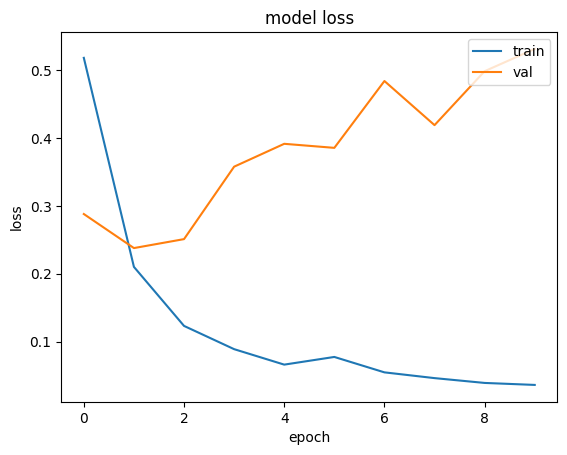

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

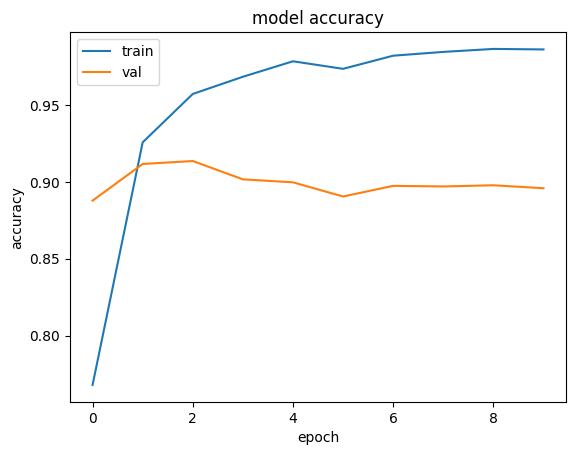

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
input_text = ['You are so handsome', 'Come on beautiful', 'Sure you are an asshole', 'Shame on you dude', 'You are definitely an idiot']
sequences = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(sequences, maxlen=110, padding='post')

In [ ]:
model.load_weights('best_model.h5')

pred = model.predict(input_text)
prediction = ['Toxic' if i > 0.5 else 'Not Toxic' for i in pred]
print(prediction)


1/1 [==============================] - 2s 2s/step
['Not Toxic', 'Not Toxic', 'Not Toxic', 'Toxic', 'Toxic']


80/80 [==============================] - 1s 10ms/step
Classification Report
              precision    recall  f1-score   support

   NON-TOXIC       0.93      0.95      0.94      1908
       TOXIC       0.85      0.79      0.82       642

    accuracy                           0.91      2550
   macro avg       0.89      0.87      0.88      2550
weighted avg       0.91      0.91      0.91      2550



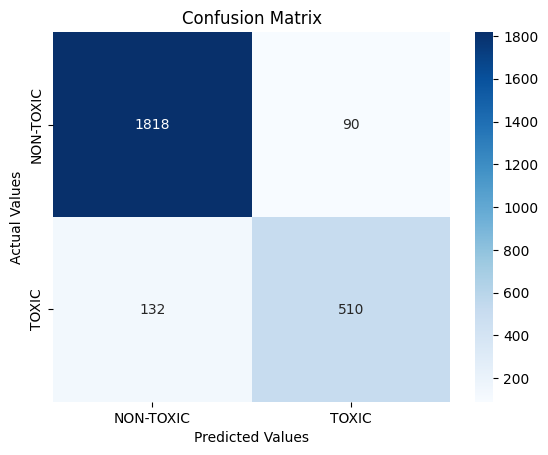

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model.load_weights('best_model.h5')

y_pred = np.where(model.predict(x_test_tokenized)>0.5, 1, 0)

class_labels = ['NON-TOXIC', 'TOXIC']

report = classification_report(y_test, y_pred, labels=np.arange(len(class_labels)), target_names=class_labels)
print('Classification Report')
print(report)

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
ax.yaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
plt.show()

**GLOVE EMBEDDING**

In [ ]:
wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q glove.6B.zip


--2024-02-13 17:31:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-02-13 17:34:13 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
glove = './glove.6B.100d.txt'
embedding_index = dict()

with open(glove, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        values = line.split()
        word = values[0]
        vector_dimensions = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector_dimensions

print(f'Found {len(embedding_index)} word vectors.')

Found 400000 word vectors.


In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
k = 0

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D ,MaxPool1D, MaxPool2D , Flatten , Dropout , BatchNormalization, LSTM, Embedding, GlobalAveragePooling1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers

batch = 128
epochs = 10

model = Sequential()
model.add(Embedding(len(word_index)+1, embedding_dim, weights=[embedding_matrix], input_length=110, trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 110, 100)          1185500   
                                                                 
 bidirectional_37 (Bidirect  (None, 110, 256)          234496    
 ional)                                                          
                                                                 
 dropout_72 (Dropout)        (None, 110, 256)          0         
                                                                 
 bidirectional_38 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_90 (Dense)            (None, 128)             

In [ ]:
save_model = ModelCheckpoint('best_model_glove.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

history = model.fit(x_train_tokenized, y_train, batch_size=batch, epochs=epochs, validation_data=(x_valid_tokenized, y_valid), shuffle = True, verbose=1,
                    callbacks=[save_model])

Epoch 1/10
92/93 [============================>.] - ETA: 0s - loss: 0.5770 - accuracy: 0.7214
Epoch 1: val_loss improved from inf to 0.51521, saving model to best_model_glove.h5
93/93 [==============================] - 18s 78ms/step - loss: 0.5759 - accuracy: 0.7221 - val_loss: 0.5152 - val_accuracy: 0.7510
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/93 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8578
Epoch 2: val_loss improved from 0.51521 to 0.40392, saving model to best_model_glove.h5
93/93 [==============================] - 4s 48ms/step - loss: 0.3801 - accuracy: 0.8581 - val_loss: 0.4039 - val_accuracy: 0.8251
Epoch 3/10
92/93 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8846
Epoch 3: val_loss improved from 0.40392 to 0.32742, saving model to best_model_glove.h5
93/93 [==============================] - 3s 36ms/step - loss: 0.2912 - accuracy: 0.8847 - val_loss: 0.3274 - val_accuracy: 0.8582
Epoch 4/10
93/93 [==============================] - ETA: 0s - loss: 0.2486 - accuracy: 0.8989
Epoch 4: val_loss improved from 0.32742 to 0.29396, saving model to best_model_glove.h5
93/93 [==============================] - 3s 35ms/step - loss: 0.2486 - accuracy: 0.8989 - val_loss: 0.2940 - val_accuracy: 0.8732
Epoch 5/10
93/93 [==============================] - ETA: 0s - loss: 0.2223 

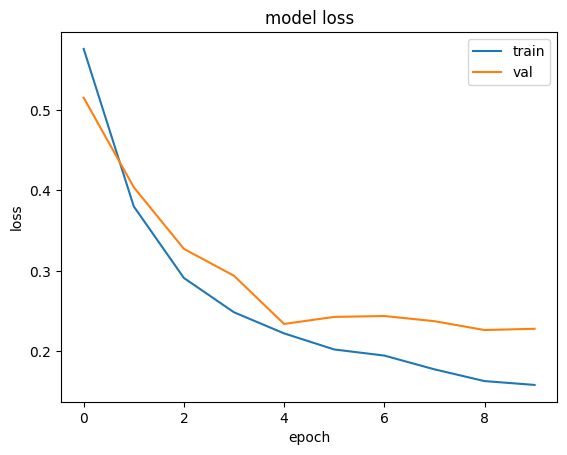

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

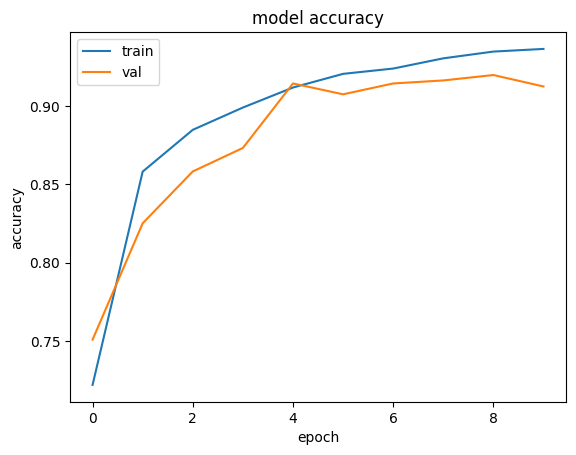

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
input_text = ['You are so handsome', 'Come on beautiful', 'Υou are an asshole for sure', 'Shame on you dude', 'You are definitely an idiot']
sequences = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(sequences, maxlen=110, padding='post')

In [ ]:
model.load_weights('best_model_glove.h5')

pred = model.predict(input_text)
prediction = ['Toxic' if i > 0.5 else 'Not Toxic' for i in pred]
print(prediction)

1/1 [==============================] - 3s 3s/step
['Not Toxic', 'Not Toxic', 'Not Toxic', 'Toxic', 'Toxic']


80/80 [==============================] - 1s 14ms/step
Classification Report
              precision    recall  f1-score   support

   NON-TOXIC       0.92      0.98      0.95      1908
       TOXIC       0.93      0.73      0.82       642

    accuracy                           0.92      2550
   macro avg       0.92      0.86      0.88      2550
weighted avg       0.92      0.92      0.92      2550



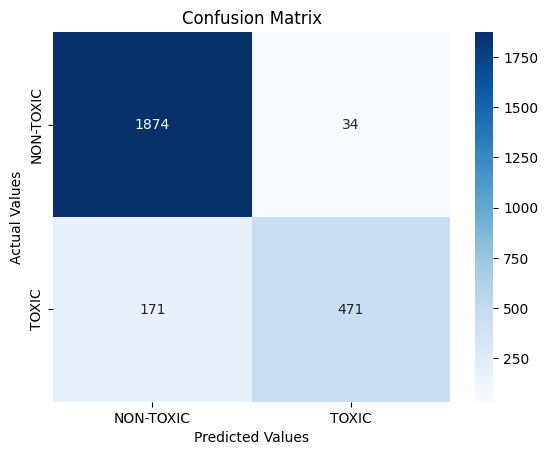

In [ ]:
model.load_weights('best_model_glove.h5')

y_pred = np.where(model.predict(x_test_tokenized)>0.5, 1, 0)

class_labels = ['NON-TOXIC', 'TOXIC']

report = classification_report(y_test, y_pred, labels=np.arange(len(class_labels)), target_names=class_labels)
print('Classification Report')
print(report)

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
ax.yaxis.set_ticklabels(['NON-TOXIC', 'TOXIC'])
plt.show()